# Data Science for Construction, Architecture and Engineering

### Week 3 - Construction - Pandas Time-Series Data

### Exercise Set 3.2 - Pandas Time-Series II

This set of exercises is the second of two sets for Week 3. These exercises are designed to give you some hands on experience in trying out the concepts from the first set of videos for this week.

There is an introduction video available to explain the process of using this exercise video.

The lead developer of this exercise is James Zhan Sicheng, a Ph.D. student at NUS and a teaching assistant of this course.

# Exercise 03.2

There are three exercises in this set, focused uses of the [Pandas](https://pandas.pydata.org/) functions introduced in the videos: fillna, normalize and merge.

### Please note that you will need to use the resultant output from Exercise 03.2.3 for the Quiz 3.2.

#### Setup the environment
The cell below is used to load the necessary packages for this exercise and setup the working directory. You will be asked to give the google drive authorization using through a given link.

In [ ]:
import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


This time I want you to help me load the drive and change the directory to navigate to the place where the `all_buildings_meta_data.csv` file is:

In [ ]:
# CODE HERE TO USE `.chdir()` TO CHANGE THE DIRECTORY TO THE LOAD THE META DATA FILE
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/")
metadata = pd.read_csv('all_buildings_meta_data.csv')

### Exercise 03.2.1 - Filtering Weather Data

In the last task of exercise 3.1, you should have noticed some strange weekly average temperature (large negative value). That is caused by some outlier in the raw data. In this exercise, try to identify the timestamps of the outliers by condition filtering. Rememder to use `resample` to first clean the timestamp.

In [ ]:
# Load the weather file and filter the data according to the criteria
# YOUR CODE HERE
# loading weather data file
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/weather_data/")
weather0 = pd.read_csv('weather0.csv', index_col='timestamp', usecols=['timestamp','TemperatureC', 'Humidity'], parse_dates=True)

In [ ]:
weather0.describe()

,TemperatureC,Humidity
count,8999.000000,8990.000000
mean,14.744705,35.108676
std,316.995945,20.269304
min,-9999.000000,4.000000
25%,17.200000,20.000000
50%,25.000000,31.000000
75%,32.200000,46.000000
max,50.000000,100.000000


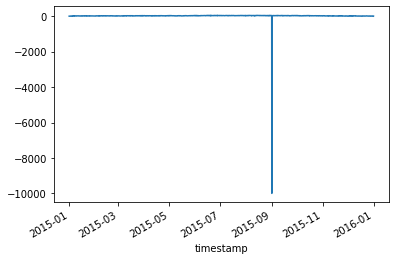

In [ ]:
weather0.TemperatureC.plot(kind='line')

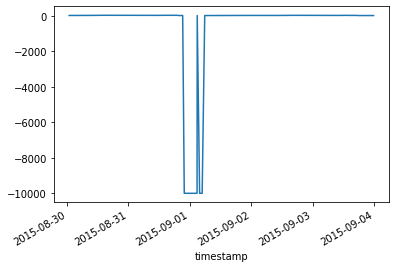

In [ ]:
weather0.TemperatureC.loc['2015-08-30':'2015-09-03'].plot(kind='line')

In [ ]:
#keep relevant data, drop all rows where Temp is <-40
weather0_filtered = weather0[weather0.TemperatureC > -40]

In [ ]:
#resample data to hourly
weather0_filtered = weather0_filtered.resample('H').mean()

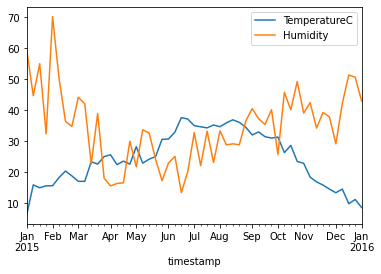

In [ ]:
weather0_filtered.resample('W').mean().plot(kind='line')

### Exercise 03.2.2 - Fixing Outliers by Interpolating

Knowing when the outliers are, in this exercise, you will correct them in two steps:
1. replace the outliers with `np.nan`
2. [`interpolate`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) the `np.nan` by linear method 
After cleaning, try to plot the hourly trend to comfirm that the outliers have been removed with no gap.

In [ ]:
# Correct the outliers by replacing and interpolating
# YOUR CODE HERE
weather0.TemperatureC.replace(to_replace=-9999, value=np.nan, inplace=True)

In [ ]:
#interpolate NaNs using fillna method
weather0.TemperatureC.fillna(method='ffill', inplace=True)

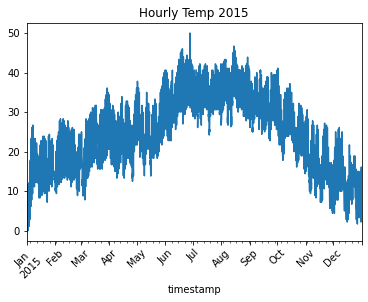

In [ ]:
weather0.TemperatureC.resample('H').mean().plot(kind='line', title='Hourly Temp 2015', rot=45)

### Exercise 03.2.3 - Normalization and Finding Highest Consuming Week

As you learned in the videos, it is straightforward to create area normalized calculations. It is also known that during a certain period, when the building is operated in a similar way, outdoor temeprature also have a strong influence on energy consumption. The figure below shows an example.

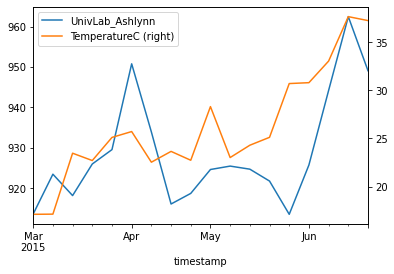

In this exerise, continue the analysis in Exercise 3.1 and compare the weekly energy consumptions of the buildings:
1. Follow the previous steps to generate a DataFrame `weekly_data` that hold the weekly average energy consumption and temperature of the building during March and July
2. Normalize the weekly consumption with the average temperature in the week and answer: which week has the highest temperature-free energy consumption?

In [ ]:
# Generate the weekly dataframe for the required period 
# YOUR CODE HERE


In [ ]:
# loading meter data file for Ashlynn
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data/")
ul_ashlynn = pd.read_csv('UnivLab_Ashlynn.csv', index_col='timestamp', parse_dates=True)

In [ ]:
weather0 = weather0.resample('H').mean()

In [ ]:
all_data = pd.concat([ul_ashlynn, weather0], axis=1)

In [ ]:
all_data.head()

,UnivLab_Ashlynn,TemperatureC,Humidity
timestamp,,,
2015-01-01 00:00:00,898.79,2.8,79.0
2015-01-01 01:00:00,887.98,2.9,77.0
2015-01-01 02:00:00,892.02,2.8,76.0
2015-01-01 03:00:00,889.06,2.2,82.0
2015-01-01 04:00:00,881.37,2.2,79.0


In [ ]:
all_data_weekly = all_data.resample('W').mean()

In [ ]:
#can use truncate or loc function to get weekly data between Mar-Jun 2015
Mar_Jun_2015 = all_data_weekly.loc['2015-03':'2015-06']
Mar_Jun_2015

,UnivLab_Ashlynn,TemperatureC,Humidity
timestamp,,,
2015-03-01,913.627381,17.134821,44.276786
2015-03-08,923.470536,17.153075,42.097222
2015-03-15,918.179821,23.472619,22.723214
2015-03-22,925.996399,22.712500,39.017857
2015-03-29,929.554405,25.110714,18.208333
2015-04-05,950.781369,25.718452,15.660714
2015-04-12,933.933810,22.540476,16.455357
2015-04-19,916.095595,23.660714,16.684524
2015-04-26,918.719554,22.699401,30.107784


In [ ]:
# Do the normalization and find the week with the highest normalized consumption
# YOUR CODE HERE
Mar_Jun_2015['Normalized_Engr'] = Mar_Jun_2015.UnivLab_Ashlynn/Mar_Jun_2015.TemperatureC

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Mar_Jun_2015

,UnivLab_Ashlynn,TemperatureC,Humidity,Normalized_Engr
timestamp,,,,
2015-03-01,913.627381,17.134821,44.276786,53.319924
2015-03-08,923.470536,17.153075,42.097222,53.837024
2015-03-15,918.179821,23.472619,22.723214,39.117059
2015-03-22,925.996399,22.712500,39.017857,40.770342
2015-03-29,929.554405,25.110714,18.208333,37.018238
2015-04-05,950.781369,25.718452,15.660714,36.968841
2015-04-12,933.933810,22.540476,16.455357,41.433633
2015-04-19,916.095595,23.660714,16.684524,38.718003
2015-04-26,918.719554,22.699401,30.107784,40.473295


### Please write down the week with the highest normalized consumption (in the form of '2015-XX-XX') as the answer for the quiz question.

In [ ]:
Mar_Jun_2015.Normalized_Engr.idxmax()

Timestamp('2015-03-08 00:00:00', freq='W-SUN')